# Logistic and Linear Regressors

In [24]:
import numpy as np
import pandas as pd
import random as random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
%matplotlib inline

def sigmoid(x):
        return 1/(1+np.exp(-x))
    
def square_loss(y_pred, y):
        return np.mean((np.square(y_pred - y))/2)
    
def normalize(x):
        x = np.array(x)
        mean = np.array([np.mean(x[:,i]) for i in range(x.shape[1])])
        std = np.array([np.std(x[:,i]) for i in range(x.shape[1])])
        norm = (x - mean)/std
        normalized = pd.DataFrame(norm)
        return normalized
    
def calculatef_score(y_prd,y_test):
    true_pos, true_neg, false_pos, false_neg = 0,0, 0,0
    for i in range(len(y_prd)):
            if y_prd[i]==y_test[i]:
                if y_prd[i]==1:
                    true_pos +=1
                elif y_prd[i]==0:
                    true_neg +=1
            else:
                if y_prd[i]==1:
                    false_pos +=1
                elif y_prd[i]==0:
                    false_neg +=1
    precision = true_pos/(true_pos+false_neg)
    recall = true_pos/(true_pos + false_neg)
    fscore = 2*precision*recall/(precision+recall)
    return fscore
def plot_square_loss(xx,loss):
    plt.scatter(np.array(xx),np.array(loss))
    plt.xlabel('Iterations')
    plt.ylabel('Square Loss')
    plt.title('Square loss Vs. Iterations')
    plt.show()
def plot_both_losses(xx,loss,lg):
    fig, (ax0, ax1) = plt.subplots(1,2, sharey=False,figsize=(11,5))
    ax0.scatter(np.array(xx),np.array(loss))
    ax0.set_xlabel('Iterations')
    ax0.set_ylabel('Square Loss')
    ax0.set_title('Square loss Vs. Iterations')
    ax1.scatter(np.array(xx),np.array(lg))
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Logg Loss')
    ax1.set_title('Log Loss Vs. Iterations')
    plt.show()  

## Logistic Regressor

In [25]:
def logistic_regression(lr,X,Y):
    loss=[]   
    X = normalize(X)
    X['b_'] = [1 for i in range(X.shape[0])]      #to take care of b
    X_train, X_test, y_train, y_test = tts(X,Y,test_size=0.2, random_state=2)
    y_train, y_test = np.array(y_train), np.array(y_test)
    W = []
    for i in range(X_train.shape[1]):          
        W.append(random.uniform(0,1))
    W = np.array(W)
    xx = []
    lg = []
    for i in range(15000):
        z = np.dot(X_train,W.T)
        y_pred = sigmoid(z)
        log_loss = np.mean(-np.dot(y_train,np.log(y_pred))-np.dot((1-y_train),np.log(1-y_pred)))
        loss.append(square_loss(y_pred,y_train))
        W -= lr*np.dot((y_pred - y_train),X_train)/X_train.shape[0]             #performed gradient descent on logloss
        xx.append(i)
        lg.append(log_loss)
    plot_both_losses(xx,loss,lg)    
    zz= np.dot(X_test, np.transpose(W))
    y_predi = sigmoid(zz)
    y_prd = []
    for term in y_predi:
        if term>=0.5:
            y_prd.append(1)
        elif term<0.5:
            y_prd.append(0)
            
    print('F-score for learning rate','{}'.format(lr), ': ',calculatef_score(y_prd,y_test))

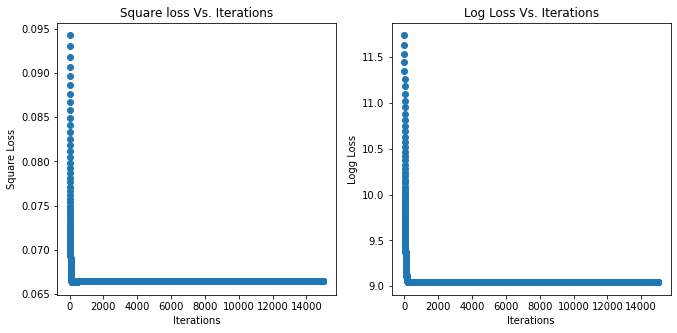

F-score for learning rate 0.1 :  0.5


In [26]:
df = pd.DataFrame({'age': [22,25,47,52, 46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23],
                   'bought_insurance':[1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})
logistic_regression(0.1,df[['age']],df['bought_insurance'])

## Linear Regressor

In [26]:
def linear_regression(lr, X, Y):
    X = normalize(X)
    X.insert(0,'b_',[1 for i in range(X.shape[0])])
    X_train, X_test, y_train, y_test = tts(X,Y,test_size=0.2, random_state=2)
    W = np.array([random.uniform(0,1) for i in range(X_test.shape[1])])
    y_train, y_test = np.array(y_train), np.array(y_test)
    loss = []
    xx = []
    for i in range(10000):
        y_pred = np.array(np.dot(X_train, W.T))
        loss.append(square_loss(y_pred, y_train))
        W -= lr*np.dot((y_pred-y_train),X_train)/X_train.shape[0]
        xx.append(i)
    plot_square_loss(xx,loss)
    y_prediction = np.dot(X_test, W.T)
    mse = np.mean(np.sum(np.square(y_test-y_prediction)))
    print('Mean square Error: ',mse)
    print('Intercept: ',W[0])
    if len(W)==2:
        print('Coefficient: ',W[1])
    else:
        print('Coefficients: ',list(W[1:]))

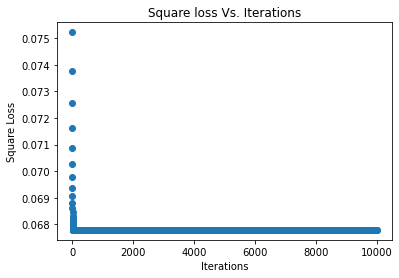

Mean square Error:  1.4360518118310628
Intercept:  0.5420001616945594
Coefficient:  0.3410290113637213


In [28]:
df = pd.DataFrame({'age': [22,25,47,52, 46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23],
                   'bought_insurance':[1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})
linear_regression(0.1,df[['age']],df['bought_insurance'])

## Linear Regressor with Regularization

In [49]:
import numpy as np
import pandas as pd
import random as random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
def linear_regression_with_regularization(lr, X, Y, lambda_):
    X = normalize(X)
    X_train, X_test, y_train, y_test = tts(X,Y,test_size=0.2, random_state=2)
    W = np.array([random.uniform(0,1) for i in range(X_test.shape[1])])
    y_train, y_test = np.array(y_train), np.array(y_test)
    b = random.uniform(0,1)
    loss = []
    xx = []
    for i in range(30000):
        y_pred = np.array(np.dot(X_train, W.T)+b)
        loss.append(square_loss(y_pred, y_train)+(((np.sum(np.square(W)))*lambda_)/(2*X_train.shape[0])))
        W -= lr*((np.dot((y_pred-y_train),X_train)+lambda_*W)/X_train.shape[0])
        b -= lr*(np.sum(y_pred-y_train))/X_train.shape[0]
        xx.append(i)
    plot_square_loss(xx,loss)
    y_prediction = np.dot(X_test, W.T)+b
    mse = np.mean(np.sum(np.square(y_test-y_prediction)))
    print('Mean square error for learning rate','{}'.format(lr),'and regularizing parameter {}'.format(lambda_), ': ',mse)
    print('Intercept: ',b)
    if len(W)==1:
        print('Coefficient: ',W[0])
    else:
        print('Coefficients: ',list(W))
    return y_prediction

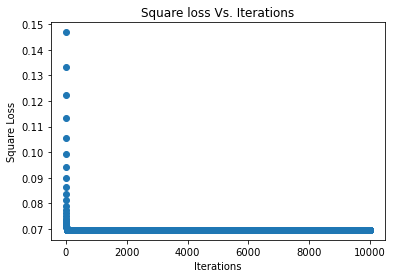

Mean square error for learning rate 0.1 and regularizing parameter 0.7 :  1.4056824232984224
Intercept:  0.5430081372578569
Coefficient:  0.32934815898544334


In [30]:

df = pd.DataFrame({'age': [22,25,47,52, 46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23],
                   'bought_insurance':[1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})
linear_regression_with_regularization(0.1,df[['age']],df['bought_insurance'],0.7)

## Logistic Regressor with Regularization

In [47]:
def logistic_regression_with_regularization(lr,X,Y, lambda_):
    loss=[]
    X = normalize(X)
    b = random.uniform(0,1)      #to take care of b
    X_train, X_test, y_train, y_test = tts(X,Y,test_size=0.2, random_state=2)
    y_train, y_test = np.array(y_train), np.array(y_test)
    W = np.array([random.uniform(0,1) for i in range(X_train.shape[1])])
    xx = []
    lg = []
    for i in range(50000):
        z = np.dot(X_train,W.T)+b
        y_pred = sigmoid(z)
        y_prd = []
    
        for term in y_pred:
            if term>=0.5:
                y_prd.append(1)
            elif term<0.5:
                y_prd.append(0)
        log_loss = ((-np.dot(y_train,np.log(y_pred))-np.dot((1-y_train),np.log(1-y_pred)))+
                   (np.sum(np.square(W))*lambda_/2))/X_train.shape[0]
        loss.append(square_loss(np.array(y_prd),y_train)+(np.sum(np.square(W))*lambda_/(2*X_train.shape[0])))
        W -= lr*((np.dot((y_pred - y_train),X_train)+(lambda_*W))/X_train.shape[0])   #performed gradient descent on logloss
        b-=  lr*np.sum(y_pred-y_train)/X_train.shape[0]
        xx.append(i)
        lg.append(log_loss)
    plot_both_losses(xx,loss,lg)   
    zz= np.dot(X_test, np.transpose(W))+b
    y_predi = sigmoid(zz)
    y_prd = []
    
    for term in y_predi:
        if term>=0.5:
            y_prd.append(1)
        elif term<0.5:
            y_prd.append(0)
            
    print('F-score for learning rate','{}'.format(lr),'and regularizing parameter {}'.format(lambda_), ': ',calculatef_score(y_prd,y_test))

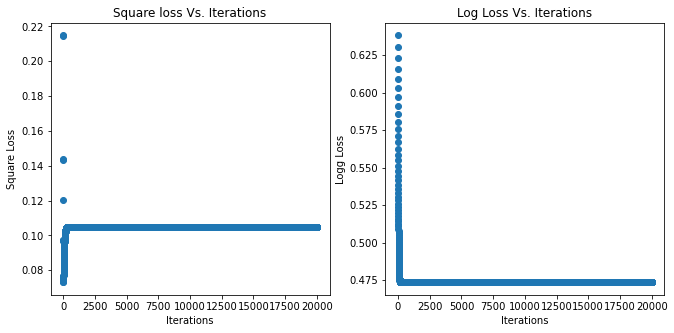

F-score for learning rate 0.1 and regularizing parameter 0.7 :  0.5


In [32]:
df = pd.DataFrame({'age': [22,25,47,52, 46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23],
                   'bought_insurance':[1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})
logistic_regression_with_regularization(0.1,df[['age']],df['bought_insurance'],0.7)

In [22]:
data  = pd.read_csv(r"C:\Users\nalin\Downloads\insurance.csv")
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


{'whiskers': [<matplotlib.lines.Line2D at 0x1f62918f2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f62918f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f629183ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f62919d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f62919d4c0>],
 'means': []}

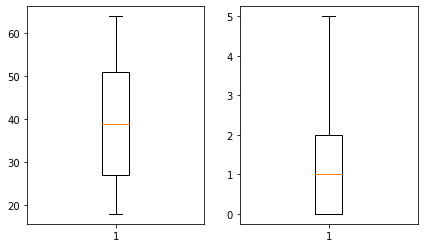

In [9]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey = False, figsize=(7,4))
axes[0].boxplot(data['age'])
axes[1].boxplot(data['children'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

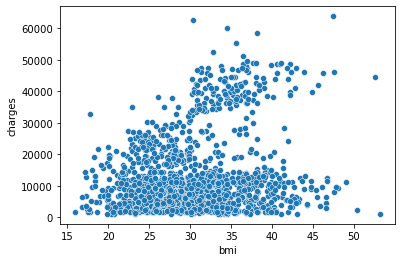

In [12]:
sns.scatterplot(data = data, x='bmi',y= 'charges')

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
data1 = data[data['charges']<52000]

In [41]:
data1[['region']].value_counts()

region   
southeast    362
southwest    324
northeast    323
northwest    323
dtype: int64

In [42]:
#One hot encoding
y = pd.get_dummies(data1.smoker, prefix = 'smoker')
z = pd.get_dummies(data1.sex)
m = pd.get_dummies(data1.region)
print(y)
print(z)
m

      smoker_no  smoker_yes
0             0           1
1             1           0
2             1           0
3             1           0
4             1           0
...         ...         ...
1333          1           0
1334          1           0
1335          1           0
1336          1           0
1337          0           1

[1332 rows x 2 columns]
      female  male
0          1     0
1          0     1
2          0     1
3          0     1
4          0     1
...      ...   ...
1333       0     1
1334       1     0
1335       1     0
1336       1     0
1337       1     0

[1332 rows x 2 columns]


,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [43]:
data1 = data1.drop('smoker',axis=1)
data1 = data1.join(y)
data1.head()

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


In [44]:
data1 = data1.drop(['region','sex'],axis=1)
data1 = data1.join(z)
data1 = data1.join(m)
data1.head()

,age,bmi,children,charges,smoker_no,smoker_yes,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


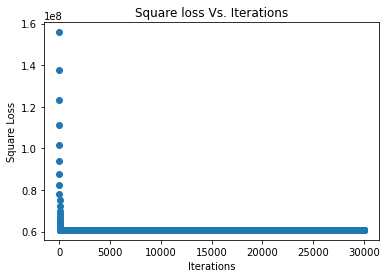

Mean square error for learning rate 0.1 and regularizing parameter 0.7 :  32185345763.48236
Intercept:  13178.520599772173
Coefficients:  [3341.301914232348, 1923.034134432917, 912.3795303407883]


In [50]:
xxx = linear_regression_with_regularization(0.1,data1[['age','bmi','children']],data1['charges'],0.7)